# Introduction

We are going to explore 'Madrid real estate market' dataset. The goal is to select and clean the appropriate features for a machine learning project, namely predicting the price of a house. 

We will learn techniques for dealing with missing values and preparing data for the algorithm.

This is a long notebook starting with over 50 attributes.

In [1]:
#Download libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.set_option("display.max_columns", None)    

Let's download the file from my gitlab account.

In [104]:
download_url = 'https://gitlab.com/mako-ml-solutions/madrid-house-prices-original/-/raw/master/dataset/houses_Madrid.csv'


The first line contains the columns' names. The first column, with no name, is the index. Columns are separated by commas. We include all this information when reading the file and we take a look at the data.

In [105]:
data = pd.read_csv(download_url, sep=',', header=0, index_col=0)
data.head()

id                                              title  \
0  21742              Piso en venta en calle de Godella, 64   
1  21741   Piso en venta en calle de la del Manojo de Rosas   
2  21740               Piso en venta en calle del Talco, 68   
3  21739               Piso en venta en calle Pedro Jiménez   
4  21738  Piso en venta en carretera de Villaverde a Val...   

                subtitle  sq_mt_built  sq_mt_useful  n_rooms  n_bathrooms  \
0  San Cristóbal, Madrid         64.0          60.0        2          1.0   
1    Los Ángeles, Madrid         70.0           NaN        3          1.0   
2     San Andrés, Madrid         94.0          54.0        2          2.0   
3     San Andrés, Madrid         64.0           NaN        2          1.0   
4    Los Rosales, Madrid        108.0          90.0        2          2.0   

   n_floors  sq_mt_allotment  latitude  longitude  \
0       NaN              NaN       NaN        NaN   
1       NaN              NaN       NaN        NaN   
2       NaN              NaN       NaN        NaN   
3       NaN              NaN       NaN        NaN   
4       NaN              NaN       NaN        NaN   

                          raw_address  is_exact_address_hidden  \
0                Calle de Godella, 64                    False   
1     Calle de la del Manojo de Rosas                     True   
2                 Calle del Talco, 68                    False   
3                 Calle Pedro Jiménez                     True   
4  Carretera de Villaverde a Vallecas                     True   

                          street_name street_number  portal floor  \
0                    Calle de Godella            64     NaN     3   
1     Calle de la del Manojo de Rosas           NaN     NaN     4   
2                     Calle del Talco            68     NaN     1   
3                 Calle Pedro Jiménez           NaN     NaN  Bajo   
4  Carretera de Villaverde a Vallecas           NaN     NaN     4   

  is_floor_under  door                                    neighborhood_id  \
0          False   NaN  Neighborhood 135: San Cristóbal (1308.89 €/m2)...   
1          False   NaN  Neighborhood 132: Los Ángeles (1796.68 €/m2) -...   
2          False   NaN  Neighborhood 134: San Andrés (1617.18 €/m2) - ...   
3           True   NaN  Neighborhood 134: San Andrés (1617.18 €/m2) - ...   
4          False   NaN  Neighborhood 133: Los Rosales (1827.79 €/m2) -...   

  operation  rent_price  rent_price_by_area  is_rent_price_known  buy_price  \
0      sale         471                 NaN                False      85000   
1      sale         666                 NaN                False     129900   
2      sale         722                 NaN                False     144247   
3      sale         583                 NaN                False     109900   
4      sale        1094                 NaN                False     260000   

   buy_price_by_area  is_buy_price_known       house_type_id  \
0               1328                True  HouseType 1: Pisos   
1               1856                True  HouseType 1: Pisos   
2               1535                True  HouseType 1: Pisos   
3               1717                True  HouseType 1: Pisos   
4               2407                True  HouseType 1: Pisos   

   is_renewal_needed is_new_development  built_year has_central_heating  \
0              False              False      1960.0                 NaN   
1               True              False         NaN                 NaN   
2              False              False         NaN               False   
3              False              False      1955.0                 NaN   
4              False              False      2003.0                 NaN   

  has_individual_heating  are_pets_allowed has_ac has_fitted_wardrobes  \
0                    NaN               NaN   True                  NaN   
1                    NaN               NaN    NaN                 True   
2                   True             

Let's find out the size of the table and learn a bit about the columns and their elements.

In [106]:
print("The number of rows is {} and the number of columns is {}".format(data.shape[0], data.shape[1]))
print("---------------------------------------------------------------")
print(data.info(verbose=True))


The number of rows is 21742 and the number of columns is 57
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21742 entries, 0 to 21741
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21742 non-null  int64  
 1   title                         21742 non-null  object 
 2   subtitle                      21742 non-null  object 
 3   sq_mt_built                   21616 non-null  float64
 4   sq_mt_useful                  8228 non-null   float64
 5   n_rooms                       21742 non-null  int64  
 6   n_bathrooms                   21726 non-null  float64
 7   n_floors                      1437 non-null   float64
 8   sq_mt_allotment               1432 non-null   float64
 9   latitude                      0 non-null      float64
 10  longitude                     0 non-null      float64


We have 21742 rows (houses) and 57 columns (attributes). Only 13 columns don't have missing values and 10 columns *only* have missing values. We will get rid of these in the first place. We'll have to analyse the rest.

As data types, we have object, boolean and numbers. Reading the names of the columns, it looks like sometimes the type should be different. Like all the columns with the word 'has_*something*' are object, and they should be boolean. We'll look into that too.

Let's check if there are duplicates.

In [107]:
data.duplicated().any()

False

'is_exact_address_hidden' is not necessary as well as 'street_name' and 'street_number'. We already have that info in 'raw_address'.

'rent_price' is not usefull to this analysis because we'll be focusing on buying.

'is_rent_price_known' and 'is_buy_price_known' don't give any interesting information because they only have one value.

We'll eliminate them, as well as columns filled with missing values.


In [108]:
data.drop(columns=['is_exact_address_hidden', 'street_name', 'street_number', 'is_rent_price_known', 'is_buy_price_known', 'rent_price'], inplace=True)
#Drop columns with missing values in every row
data.dropna(axis=1, how='all', inplace=True)
print("The new number of columns is {}".format(data.shape[1]))

The new number of columns is 41


Let's take a look at the correlation between numerical features, knowing that our target is 'buy_price'.

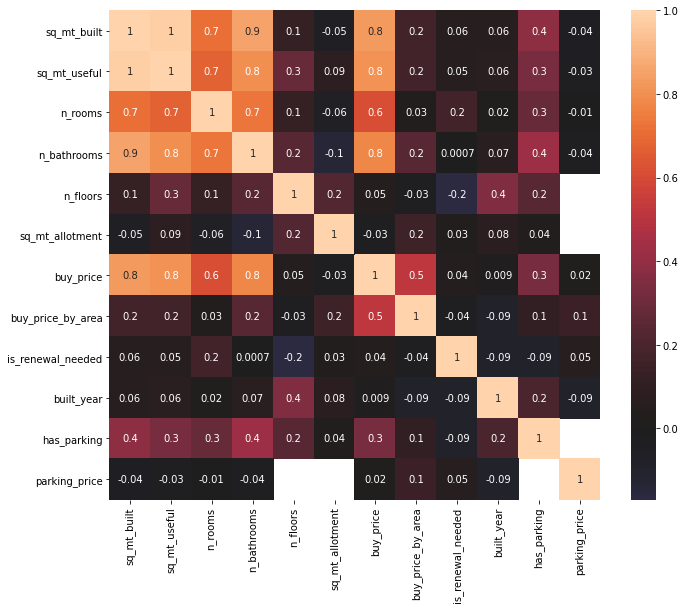

In [109]:
corr = data.iloc[:,1:].corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr ,annot=True, fmt='.1g',center=0) 
plt.show()

## First impressions:
There are no significant negative correlations, they are all positive or 0.

There's a perfect correlation between 'sq_mt_built' and 'sq_mt_useful', which makes sense because they are two similar ways of measuring a house.

'buy_price' is positive correlated with these two attributes, which shows that the bigger the house, the more expensive.

However 'buy_price' has no correlation (-0.03) with 'sq_mt_allotment' which is mainly used for houses, including garden, pool, ..., the whole lot. Although there are very few non null values.

'buy_price' is also correlated with the number of rooms and bathrooms, which are correlated to the flat's size.

We have to keep in mind that this pearson correlation coefficient only measures the linear dependence between two variables.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

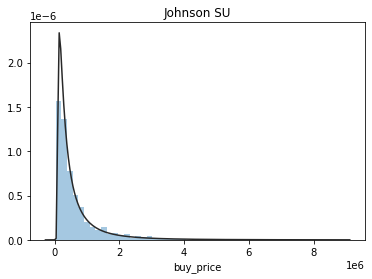

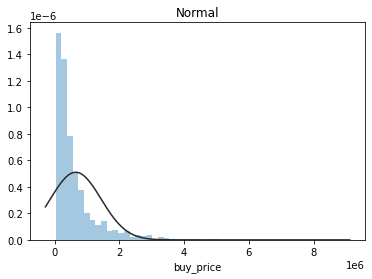

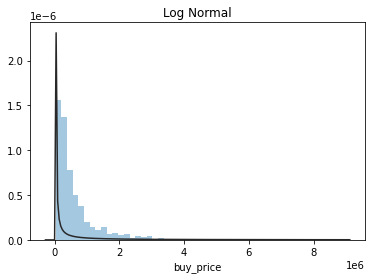

In [111]:
y = data['buy_price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)
plt.show()


We can see that 'buy_price' follows a Johnson SU distribution, which means it's a skewed distibution with a long tail.

## Now, we'll analyse the columns.

'Title' includes the full address and the type (piso, casa,...) and 'subtitle' describes the area in Madrid, both with no missing values. We'll leave them like that for the moment while we study the rest of the data.

'sq_mt_built' and 'sq_mt_useful' are two ways of measuring the size of a house. They are equivalent and 'sq_mt_built' has fewer missing values (126 vs over 13000). The first option would be to drop the second column, but let's check the three atributes related to size.

## size

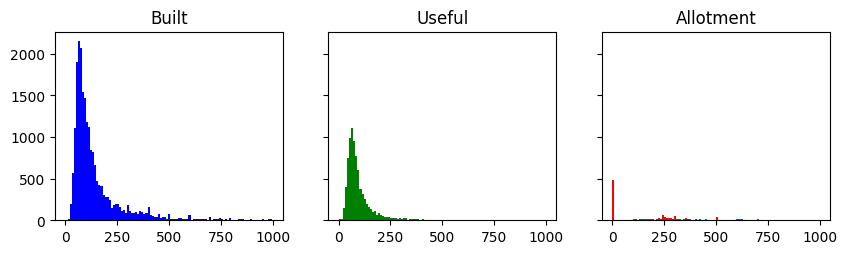

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)

ax[0].hist(data.sq_mt_built, bins=100, color='b')
ax[0].set_title('Built')
ax[1].hist(data.sq_mt_useful, bins=100, color='g')
ax[1].set_title('Useful')
ax[2].hist(data.sq_mt_allotment, bins=100, color='r')
ax[2].set_title('Allotment')
plt.show()

m² built and m² useful have similar right skewed distributions with many small houses. It's more difficult to see the shape for m² allotment. 

Let's try another type of plot.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


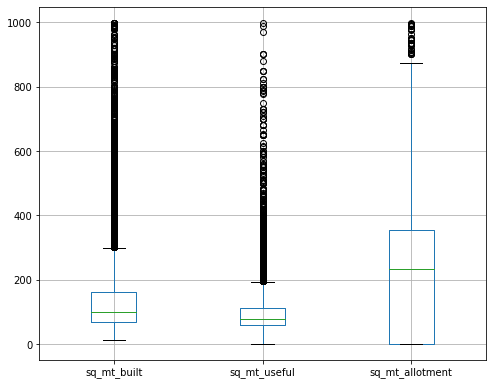

In [114]:
f, ax = plt.subplots(figsize=(8, 6.5))

data.boxplot(column=['sq_mt_built', 'sq_mt_useful', 'sq_mt_allotment'])
plt.show()

Boxplots show more information although it may be more difficult to see. Let's take it one step at a time.

* m² built and m² useful boxes are shorter, which means that their values are grouped together (their standard deviations are smaller), with the median closer to the first quartile. We saw this in the previous plot with their high and narrow peaks.
* However, m² allotment's box is bigger, showing that its values are more scattered (the standard deviation is bigger) and the median is closer to the third quartile.
* This also shows that the majority of the values for m² built and m² useful are between 100 and almost 200 m² (more or less). While the majority of the values for m² allotment are in a wider range, between 0 and almost 400 m².
* The longer upper whisker for m² allotment shows a very long right tail.
* All of them have outliers (the circles). These are values beyond 1.5 times the distance between the third and the first quartile. 
* All of this shows (for the first two) that while the majority of the houses are small (75% are less than 200 m²), there are still many items (25%) much much bigger.

Let's take a closer look at the limits of these three atributes and plot them against the goal.

In [120]:
data[['sq_mt_built', 'sq_mt_useful', 'sq_mt_allotment']].describe()

sq_mt_built  sq_mt_useful  sq_mt_allotment
count  21616.000000   8228.000000      1432.000000
mean     146.920892    103.458192       241.692737
std      134.181865     88.259192       247.484853
min       13.000000      1.000000         1.000000
25%       70.000000     59.000000         2.000000
50%      100.000000     79.000000       232.000000
75%      162.000000    113.000000       354.000000
max      999.000000    998.000000       997.000000

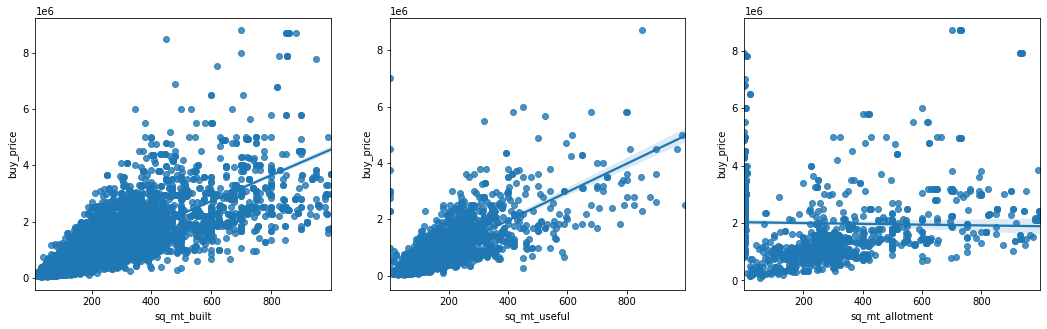

In [130]:
fig, ax = plt.subplots(1,3, figsize=(18,5))
sns.regplot(data=data, x='sq_mt_built', y='buy_price', ax=ax[0])
sns.regplot(data=data, x='sq_mt_useful', y='buy_price', ax=ax[1])
sns.regplot(data=data, x='sq_mt_allotment', y='buy_price', ax=ax[2])
plt.show()

Wow! There is something weird here. Houses with 1 m² useful and 1 m² allotment?
It looks like the numbers were cut after 1000. Let's see the smallest values of m² built.

In [131]:
data.query('sq_mt_built<23.0')[['title','sq_mt_built', 'sq_mt_useful', 'n_rooms']]

title  sq_mt_built  \
105                       Piso en venta en calle Platino         16.0   
3248              Estudio en venta en calle Juan Pantoja         18.0   
4942                       Estudio en venta en San Diego         22.0   
5650             Estudio en venta en calle Emilio Ortuño         13.0   
11517                    Estudio en venta en Castillo, 6         20.0   
11701                        Piso en venta en Gaztambide         20.0   
12329           Piso en venta en calle de Santa Engracia         22.0   
17491                            Estudio en venta en Sol         19.0   
17617       Estudio en venta en calle del Amparo, Madrid         15.0   
18107  Estudio en venta en calle de San Vicente Ferre...         20.0   
18487           Estudio en venta en calle del Tesoro, 21         21.0   
18646    Piso en venta en calle de Bernardo López García         21.0   
18829                       Piso en venta en sombrereria         18.0   
18997                     Piso en venta en calle Salitre         18.0   
20153                      Piso en venta en calle Ancora         22.0   
20156          Estudio en venta en paseo de las Delicias         22.0   
20708        Estudio en venta en TENIENTE CORONEL NOREÑA         21.0   
20944             Estudio en venta en calle Arquitectura         21.0   

       sq_mt_useful  n_rooms  
105             NaN        3  
3248           15.0        0  
4942            NaN        0  
5650           11.0        0  
11517           NaN        0  
11701           NaN        1  
12329          19.0        1  
17491           NaN        0  
17617           NaN        0  
18107           NaN        0  
18487          17.0        0  
18646          20.0        1  
18829           NaN        1  
18997          15.0        1  
20153           NaN        1  
20156           NaN        0  
20708           NaN        0  
20944           NaN        0

The first one is weird. A 16 m² flat with 3 rooms, but the others make sense. They are small flats with no rooms (Estudio) or just one room.

Let's see the smallest values for square meter useful:

In [132]:
data.query('sq_mt_useful<15.0')[['title','sq_mt_built', 'sq_mt_useful', 'n_rooms', 'n_bathrooms']]

title  sq_mt_built  \
37            Piso en venta en paseo de Alberto Palacios         60.0   
4056   Piso en venta en avenida de la Ciudad de Barce...        160.0   
5079                       Piso en venta en calle Lozano         45.0   
5650             Estudio en venta en calle Emilio Ortuño         13.0   
6926                Casa o chalet en venta en Valdemarín          NaN   
7051    Casa o chalet independiente en venta en Calle...          NaN   
7146    Casa o chalet independiente en venta en calle...          NaN   
7160    Casa o chalet independiente en venta en Urb. ...          NaN   
7188    Casa o chalet independiente en venta en calle...          NaN   
7614    Casa o chalet independiente en venta en Urb. ...          NaN   
7789      Casa o chalet en venta en calle Amorebieta, 25          NaN   
7980    Casa o chalet independiente en venta en Urb. ...          NaN   
8015    Casa o chalet independiente en venta en calle...          NaN   
9417                 Piso en venta en calle de La Bañeza        177.0   
11497                      Piso en venta en VALLEHERMOSO        260.0   
15986                    Piso en venta en avenida Oporto         55.0   
16413                  Piso en venta en calle de Juanita         54.0   
19500               Piso en venta en calle de Hermosilla        130.0   
20861            Piso en venta en calle de Méndez Álvaro        116.0   
21128               Dúplex en venta en calle de Guetaria         90.0   

       sq_mt_useful  n_rooms  n_bathrooms  
37              1.0        2          1.0  
4056            1.0        4          2.0  
5079            1.0        1          1.0  
5650           11.0        0          1.0  
6926            1.0        7          9.0  
7051            1.0        9          9.0  
7146            1.0        7          8.0  
7160            2.0       11         14.0  
7188            1.0        7          6.0  
7614            1.0        5          5.0  
7789            1.0        5          2.0  
7980            1.0        6          6.0  
8015            1.0        8         13.0  
9417            1.0        3          3.0  
11497           2.0        5          3.0  
15986          12.0        2          1.0  
16413           1.0        1          1.0  
19500          13.0        4          2.0  
20861          12.0        3          2.0  
21128           1.0        1          1.0

There are certainly weird relationships here between these two columns with very small numbers for m² useful. But the values for houses ('Casa o chalet') seeing the number of rooms and bathrooms, may be in the range of thousands. 

We can use two other atributes to find the right size: 'buy_price' and 'buy_price_by_area'. Both with no missing values.

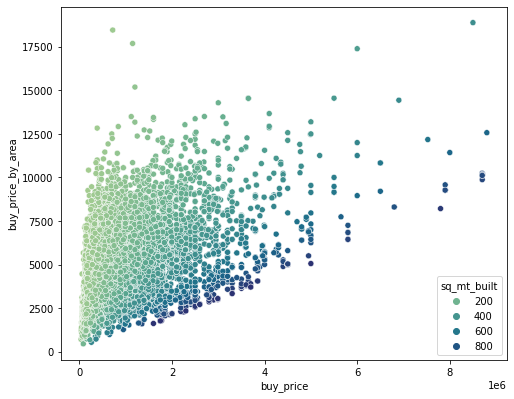

In [133]:
f, ax = plt.subplots(figsize=(8, 6.5))

sns.scatterplot(data=data, x='buy_price', y='buy_price_by_area', hue='sq_mt_built', palette='crest', ax=ax)
plt.show()

In most cases, prices are under 3 million €.
Let's confirm that we don't have any missing values for 'built' and we will get rid of 'sq_mt_useful':

In [134]:
rel_built = data['sq_mt_built'].isnull()
data.loc[(rel_built), 'sq_mt_built'] = (data['buy_price'] / data['buy_price_by_area'])

print('The final number of missing values for sq_mt_built is: {}'.format(data.sq_mt_built.isnull().sum()))

data.drop(columns=["sq_mt_useful"], inplace=True)

The final number of missing values for sq_mt_built is: 0


Now every single house has it's size. Next one:

## sq_mt_allotment

Let's see the relationship between 'sq_mt_allotment' and the house's type:

In [135]:
data.house_type_id = data.house_type_id.astype('str')

In [136]:
allotment_notnull = ((data.sq_mt_allotment.notnull())& (data.house_type_id.str.contains('Casa'))).sum()
print("The number of houses with no empty values in 'sq_mt_allotment' is {} from a total of 1432 no null values".format(allotment_notnull))

The number of houses with no empty values in 'sq_mt_allotment' is 1429 from a total of 1432 no null values


Which means that this colum, m² allotment, is almost exclusively for detached houses. Let's see the other three.

In [137]:
data[(data.sq_mt_allotment.notnull())& (~data.house_type_id.str.contains('Casa'))][['title', 'sq_mt_built', 'sq_mt_allotment', 'n_floors', 'house_type_id']]

title  sq_mt_built  \
7578   Casa de pueblo en venta en calle Agustín Lara        132.0   
8400         Finca rústica en venta en TIRO A PICHON        450.0   
8423              Finca rústica en venta en El Pardo        450.0   

      sq_mt_allotment  n_floors house_type_id  
7578            275.0       NaN           nan  
8400             72.0       2.0           nan  
8423             71.0       2.0           nan

It's a country house and two fields.

These three rows could be dropped if there are no more elements of the same type. We'll check 'house_type_id' later.

Square meter allotment is a challenge because it's difficult to tell the right size for many houses. 

The histogram shows almost 500 houses with very small plots. Checking in more detail, we find that the majority are between 1 and 5 square meters, which makes no sense.

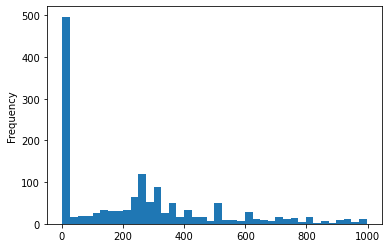

In [138]:
data['sq_mt_allotment'].plot.hist(bins=40)
plt.show()

In [139]:
print("Number of houses with less than 6 m²: {}".format(data.query('sq_mt_allotment<6').shape[0]))
print("Number of houses between 4 y 10 m²: {}".format(data.query('4<sq_mt_allotment<10').shape[0]))
print("Number of houses between 9 y 15 m²: {}".format(data.query('9<sq_mt_allotment<15').shape[0]))
print("Number of houses between 15 y 20 m²: {}".format(data.query('15<sq_mt_allotment<20.0').shape[0]))
print("Number of houses between 19 y 25 m²: {}".format(data.query('19<sq_mt_allotment<25').shape[0]))
print("Number of houses between 29 y 35 m²: {}".format(data.query('29<sq_mt_allotment<35').shape[0]))

Number of houses with less than 6 m²: 472
Number of houses between 4 y 10 m²: 14
Number of houses between 9 y 15 m²: 6
Number of houses between 15 y 20 m²: 0
Number of houses between 19 y 25 m²: 8
Number of houses between 29 y 35 m²: 2


In [140]:
data.query('sq_mt_allotment<6')[['title', 'subtitle', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'buy_price']].head()

title         subtitle  \
5709          Casa o chalet en venta en calle Camarines  Aravaca, Madrid   
5727   Casa o chalet independiente en venta en calle...  Aravaca, Madrid   
5728   Casa o chalet independiente en venta en Ciuda...  Moncloa, Madrid   
5739   Casa o chalet independiente en venta en Ciuda...  Moncloa, Madrid   
5741   Casa o chalet independiente en venta en El Pl...  Moncloa, Madrid   

      sq_mt_built  n_rooms  n_bathrooms  n_floors  sq_mt_allotment  buy_price  
5709        584.0        7          4.0       2.0              3.0    1990000  
5727        800.0        6          8.0       4.0              1.0    1680000  
5728        280.0        5          3.0       2.0              2.0    1590000  
5739        611.0        6          8.0       NaN              1.0    2950000  
5741        396.0        5          4.0       3.0              2.0    1350000

It seems weird for a house of over 500 m² and over a million euros to have 3 m² of garden/land. So we may hypothesize that plots over a thousand meters lost everything after the point, like it happened with square meters build. 

However the solution here is not easy, because we may have big, expensive houses with over 20000 m² plots and other ones with a small inner courtyard.

So, in this case, we'll apply two strategies:

1. Houses with less than 10 m² allotment: multiply the size by 1000.
2. Houses between 10 and 30 m² allotment: we need two parameters, the plot's size and the prize of the house.

We'll put the limit in 30 m² because there aren't houses over 30 m² allotment expensive enough to have 30000, 40000 or more meters.

In [211]:
rel_allotment1 = (data['sq_mt_allotment'] <10)
data.loc[(rel_allotment1), 'sq_mt_allotment'] = (data['sq_mt_allotment'] * 1000)

In [212]:
rel_allotment2 = (data['sq_mt_allotment'] <30) & (data['buy_price'] > 1000000)
data.loc[(rel_allotment2), 'sq_mt_allotment'] = (data['sq_mt_allotment'] * 1000)

In [213]:
print(data.sq_mt_allotment.describe())
data.query('sq_mt_allotment<30')[['title', 'subtitle', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'buy_price']].head()

count     1429.000000
mean       879.477957
std       1298.000932
min         10.000000
25%        263.000000
50%        500.000000
75%       1000.000000
max      21000.000000
Name: sq_mt_allotment, dtype: float64


KeyError: ignored

Now we can see that the smallest value is 10 and the biggest is 21000 m². (Checking real state web pages, I found houses with these characteristics)

Size and price of the houses still under 30, justify not changing 'sq_mt_allotment'

For the rest of the houses, we'll replace the missing value NaN with 0. Because they don't have gardens of any kind.

In [214]:
data['sq_mt_allotment'] = data['sq_mt_allotment'].fillna(0)
print("Number of missing values in 'sq_mt_allotment': {}".format(data.sq_mt_allotment.isnull().sum()))

Number of missing values in 'sq_mt_allotment': 0


## house_type_id

Let's deal with 'house_type_id' to add a new class we'll need.

In [27]:
data.house_type_id.value_counts() 

HouseType 1: Pisos            17705
HouseType 2: Casa o chalet     1938
HouseType 5: Áticos            1032
HouseType 4: Dúplex             676
nan                             391
Name: house_type_id, dtype: int64

In [142]:
rel_housetype = ((data.title.str.contains('Estudio')) & (data.house_type_id.str.contains('nan')))
print(data[rel_housetype].shape[0])

388


So 388 out of these 391 missing values contain the word 'Estudio' in 'title'. Let's change the value adding a new type: "Housetype 3: Estudio".

The other 3 are the ones we found earlier and we can eliminate.

In [144]:
data.loc[(rel_housetype), 'house_type_id'] = "HouseType 3: Estudio"

data.drop(index=[7578, 8400, 8423], inplace=True)

Let's check if all these 'Estudios' have 0 rooms:

In [30]:
data[(data.house_type_id.str.contains('Estudio') & (data.n_rooms == 0))].shape[0]

385

No, there are 3 houses with at least one room. Let's see them.

In [31]:
rel_estudios = (data.house_type_id.str.contains('Estudio') & (data.n_rooms > 0))
data[rel_estudios]

id                                         title  \
6197   15545   Estudio en venta en calle Navas del Rey, 30   
11964   9778   Estudio en venta en calle de Gaztambide, 36   
12274   9468  Estudio en venta en calle Santa Engracia, 51   

                       subtitle  sq_mt_built  n_rooms  n_bathrooms  n_floors  \
6197   Puerta del Ángel, Madrid         45.0        1          1.0       NaN   
11964        Gaztambide, Madrid         75.0        1          2.0       NaN   
12274         Trafalgar, Madrid         64.0        1          1.0       NaN   

       sq_mt_allotment               raw_address floor is_floor_under  \
6197               0.0   Calle Navas del Rey, 30  Bajo           True   
11964              0.0   Calle de Gaztambide, 36  Bajo           True   
12274              0.0  Calle Santa Engracia, 51     2          False   

                                         neighborhood_id operation  buy_price  \
6197   Neighborhood 70: Puerta del Ángel (2443.62 €/m...      sale     155000   
11964  Neighborhood 34: Gaztambide (5000.0 €/m2) - Di...      sale     350000   
12274  Neighborhood 35: Trafalgar (5640.18 €/m2) - Di...      sale     485000   

       buy_price_by_area         house_type_id  is_renewal_needed  \
6197                3444  HouseType 3: Estudio              False   
11964               4667  HouseType 3: Estudio               True   
12274               7578  HouseType 3: Estudio              False   

      is_new_development  built_year has_central_heating  \
6197               False         NaN               False   
11964              False      1984.0                 NaN   
12274               True         NaN                 NaN   

      has_individual_heating has_ac has_fitted_wardrobes has_lift is_exterior  \
6197                    True   True                 True    False       False   
11964                    NaN   True                  NaN    False        True   
12274                    NaN    NaN                  NaN     True        True   

      has_garden has_pool has_terrace has_balcony has_storage_room  \
6197         NaN      NaN         NaN         NaN             True   
11964        NaN      NaN         NaN         NaN              NaN   
12274        NaN     True         NaN         NaN             True   

      is_accessible has_green_zones energy_certificate  has_parking  \
6197            NaN             NaN        no indicado        False   
11964           NaN             NaN        no indicado        False   
12274           NaN             NaN                  A         True   

      is_parking_included_in_price  parking_price is_orientation_north  \
6197                           NaN            NaN                False   
11964                          NaN            NaN                False   
12274                         True            0.0                  NaN   

      is_orientation_west is_orientation_south is_orientation_east  
6197                 True                False                True  
11964                True                False               False  
12274                 NaN                  NaN                 NaN

Let's change this three into flats 'Pisos'.

In [32]:
data.loc[(rel_estudios), 'house_type_id'] = "HouseType 1: Pisos"

In [33]:
print("Data on 'Estudios'", data.loc[data.house_type_id.str.contains('Estudio')][['sq_mt_built', 'buy_price']].describe(), sep="\n") 
print("Data on 'Pisos' flats", data.loc[data.house_type_id.str.contains('Piso')][['sq_mt_built', 'buy_price']].describe(), sep="\n")

Data on 'Estudios'
       sq_mt_built     buy_price
count   385.000000  3.850000e+02
mean     53.337662  2.102311e+05
std      36.322274  1.352290e+05
min      13.000000  5.299000e+04
25%      35.000000  1.360000e+05
50%      44.000000  1.850000e+05
75%      57.000000  2.465000e+05
max     300.000000  1.600000e+06
Data on 'Pisos' flats
        sq_mt_built     buy_price
count  17708.000000  1.770800e+04
mean     117.548961  5.204200e+05
std       79.827618  5.762118e+05
min       16.000000  3.600000e+04
25%       68.000000  1.810000e+05
50%       93.000000  3.300000e+05
75%      138.000000  6.103620e+05
max      894.000000  8.500000e+06


Surprise, surprise. A 300 m² studio! This is weird. Let's take a look.

In [34]:
data[(data.house_type_id.str.contains('Estudio')) & (data.floor == 'Bajo') & (data.sq_mt_built > 100)][['title', 'subtitle', 'sq_mt_built', 
                                                                                                        'n_bathrooms', 'buy_price']].sort_values(by='sq_mt_built')

title  \
16577            Estudio en venta en calle Falcinelo, 35   
2229    Estudio en venta en calle de Ramón Luján, Madrid   
14889             Estudio en venta en calle Zabaleta, 11   
11921         Estudio en venta en calle Calvo Asensio, 4   
6250                Estudio en venta en paseo Olivos, 27   
3351      Estudio en venta en calle Mariano Fernández, 4   
3805                   Estudio en venta en Valdeacederas   
4345   Estudio en venta en paseo de la Infanta Isabel...   
11823               Estudio en venta en calle Feijóo, 11   
3705   Estudio en venta en Urb. Almenara, Ventilla-Al...   
18502  Estudio en venta en calle de San Ildefonso, Ma...   
6937                         Estudio en venta en Aravaca   
20393      Estudio en venta en calle de Martín de Vargas   
15164            Estudio en venta en calle Alustante, 27   
6350         Estudio en venta en calle del Palmípedo, 19   
16491     Estudio en venta en calle Dolores Armengot, 30   
14699    Estudio en venta en calle de Luis de Salazar, 4   
15468    Estudio en venta en calle de Luis de Salazar, 4   
15539                    Estudio en venta en Prosperidad   
3455          Estudio en venta en calle de las Magnolias   
2584               Estudio en venta en Cuzco-Castillejos   

                           subtitle  sq_mt_built  n_bathrooms  buy_price  
16577         Puerta Bonita, Madrid        104.0          1.0     151151  
2229            Almendrales, Madrid        110.0          2.0     120000  
14889           Prosperidad, Madrid        110.0          2.0     375000  
11921            Gaztambide, Madrid        110.0          2.0     360000  
6250       Puerta del Ángel, Madrid        110.0          2.0     180000  
3351             Berruguete, Madrid        112.0          1.0     259470  
3805                 Tetuán, Madrid        115.0          1.0     395000  
4345              Jerónimos, Madrid        119.0          2.0     750000  
11823             Trafalgar, Madrid        120.0          1.0     350000  
3705                 Tetuán, Madrid        120.0          1.0     240000  
18502  Lavapiés-Embajadores, Madrid        133.0          1.0     315000  
6937                Moncloa, Madrid        138.0          1.0     450000  
20393               Acacias, Madrid        139.0          2.0     445000  
15164           Prosperidad, Madrid        160.0          2.0     395000  
6350                 Lucero, Madrid        220.0          1.0     160000  
16491          Vista Alegre, Madrid        225.0          2.0     400000  
14699           Prosperidad, Madrid        226.0          2.0     595000  
15468           Prosperidad, Madrid        239.0          2.0     595000  
15539             Chamartín, Madrid        251.0          2.0     800000  
3455      Ventilla-Almenara, Madrid        270.0          2.0     495000  
2584                 Tetuán, Madrid        300.0          1.0    1600000

Aha! There are two types of flats in this category: the small ones and the big ones, which may come from a previous store transformed into an appartment. All of them with the same number of bathrooms.

Finally, this is the distributions of houses' types versus prices.

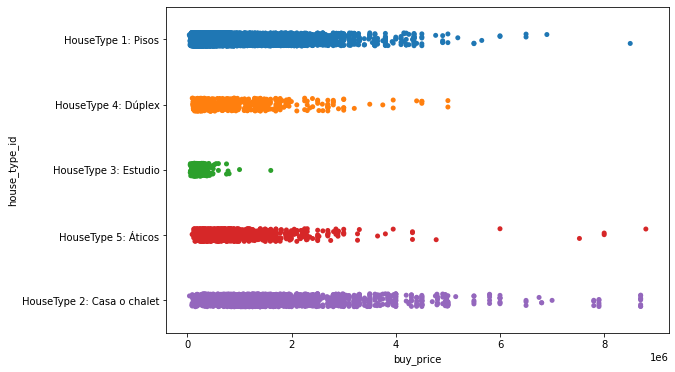

In [145]:
f, ax = plt.subplots(figsize=(9, 6))

sns.stripplot(y='house_type_id', x='buy_price', data=data, ax=ax)
plt.show()

## n_rooms

Let's continue with the number of rooms and bathrooms.

'n_rooms' doesn't have any missing values and it's of type integer.

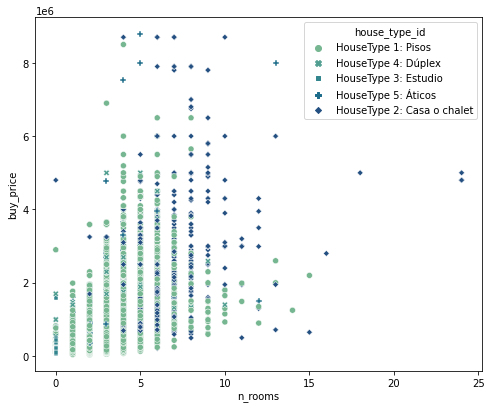

In [36]:
f, ax = plt.subplots(figsize=(8, 6.5))

sns.scatterplot(data=data, x='n_rooms', y='buy_price', hue='house_type_id', style='house_type_id', palette='crest', ax=ax)
plt.show()

The correlation between rooms and price was 0.6. We can see this value explained in the plot. Increasing the number of rooms, increase the price but only up to a point. After 5 there isn't a significant increase.

House types 2 and 5 with 4 to 10 rooms are the most expensive.

In [37]:
data.n_rooms.value_counts()

3     7213
2     5499
4     3367
1     2267
5     1755
6      715
0      439
7      259
8      112
9       54
10      26
11      10
12       9
13       6
24       3
15       2
14       1
18       1
16       1
Name: n_rooms, dtype: int64

Three houses with 24 rooms. Wow!

There are 439 houses with no rooms which should be 'Estudios' but we only had 385 'Estudios'.

Let's check the rest of these houses with no rooms.

In [38]:
rel_noestudios = (data.n_rooms == 0) & (~data.house_type_id.str.contains('Estudio'))
data.loc[(rel_noestudios)]['house_type_id'].value_counts()

HouseType 4: Dúplex           21
HouseType 1: Pisos            19
HouseType 5: Áticos           12
HouseType 2: Casa o chalet     2
Name: house_type_id, dtype: int64

There's something wrong here. It's very weird to find detached houses or duplex with no rooms.

In [39]:
rel_casa_norooms = data.loc[(rel_noestudios) & (data.house_type_id == "HouseType 2: Casa o chalet")]
rel_casa_norooms

id                                              title  \
9347   12395   Casa o chalet independiente en venta en Peñag...   
14045   7697                 Chalet pareado en venta en El Viso   

                 subtitle  sq_mt_built  n_rooms  n_bathrooms  n_floors  \
9347   Fuencarral, Madrid        309.0        0          NaN       NaN   
14045   Chamartín, Madrid        750.0        0          NaN       NaN   

       sq_mt_allotment raw_address floor is_floor_under  \
9347               0.0         NaN   NaN            NaN   
14045              0.0         NaN   NaN            NaN   

                                         neighborhood_id operation  buy_price  \
9347   Neighborhood 53: Peñagrande (3271.96 €/m2) - D...      sale     370000   
14045  Neighborhood 28: El Viso (6255.45 €/m2) - Dist...      sale    4800000   

       buy_price_by_area               house_type_id  is_renewal_needed  \
9347                1197  HouseType 2: Casa o chalet               True   
14045               6400  HouseType 2: Casa o chalet               True   

      is_new_development  built_year has_central_heating  \
9347               False         NaN                 NaN   
14045              False         NaN                 NaN   

      has_individual_heating has_ac has_fitted_wardrobes has_lift is_exterior  \
9347                     NaN    NaN                  NaN      NaN         NaN   
14045                    NaN    NaN                  NaN      NaN         NaN   

      has_garden has_pool has_terrace has_balcony has_storage_room  \
9347         NaN      NaN         NaN         NaN              NaN   
14045       True      NaN        True         NaN             True   

      is_accessible has_green_zones energy_certificate  has_parking  \
9347            NaN             NaN    inmueble exento        False   
14045           NaN             NaN         en trámite         True   

      is_parking_included_in_price  parking_price is_orientation_north  \
9347                           NaN            NaN                False   
14045                         True            0.0                  NaN   

      is_orientation_west is_orientation_south is_orientation_east  
9347                False                 True                True  
14045                 NaN                  NaN                 NaN

Let's check similar houses in Fuencarral to impute the missing values.

In [40]:
data[(data.subtitle.str.contains('Fuencarral')) & (data.title.str.contains('Casa', 'independiente')) & (250 < data.sq_mt_built) & 
     (data.sq_mt_built < 350)]

id                                              title  \
8308  13434   Casa o chalet independiente en venta en Miras...   
8954  12788   Casa o chalet independiente en venta en Miras...   
9251  12491   Casa o chalet independiente en venta en Miras...   
9347  12395   Casa o chalet independiente en venta en Peñag...   
9357  12385   Casa o chalet en venta en Tres Olivos - Valverde   

                subtitle  sq_mt_built  n_rooms  n_bathrooms  n_floors  \
8308  Fuencarral, Madrid        319.0        5          3.0       2.0   
8954  Fuencarral, Madrid        320.0        4          3.0       NaN   
9251  Fuencarral, Madrid        276.0        5          3.0       2.0   
9347  Fuencarral, Madrid        309.0        0          NaN       NaN   
9357  Fuencarral, Madrid        317.0        3          2.0       NaN   

      sq_mt_allotment raw_address floor is_floor_under  \
8308           1000.0         NaN   NaN          False   
8954              0.0         NaN   NaN            NaN   
9251           1000.0         NaN   NaN          False   
9347              0.0         NaN   NaN            NaN   
9357              0.0         NaN   NaN            NaN   

                                        neighborhood_id operation  buy_price  \
8308  Neighborhood 56: Mirasierra (3695.5 €/m2) - Di...      sale    1650000   
8954  Neighborhood 56: Mirasierra (3695.5 €/m2) - Di...      sale    1650000   
9251  Neighborhood 56: Mirasierra (3695.5 €/m2) - Di...      sale    1550000   
9347  Neighborhood 53: Peñagrande (3271.96 €/m2) - D...      sale     370000   
9357  Neighborhood 55: Tres Olivos - Valverde (2648....      sale     649000   

      buy_price_by_area               house_type_id  is_renewal_needed  \
8308               5172  HouseType 2: Casa o chalet              False   
8954               5156  HouseType 2: Casa o chalet               True   
9251               5616  HouseType 2: Casa o chalet              False   
9347               1197  HouseType 2: Casa o chalet               True   
9357               2047  HouseType 2: Casa o chalet              False   

     is_new_development  built_year has_central_heating  \
8308              False      1968.0               False   
8954              False         NaN                 NaN   
9251              False         NaN               False   
9347              False         NaN                 NaN   
9357                NaN         NaN                 NaN   

     has_individual_heating has_ac has_fitted_wardrobes has_lift is_exterior  \
8308                   True    NaN                 True      NaN         NaN   
8954                    NaN    NaN                  NaN      NaN         NaN   
9251                   True   True                 True      NaN         NaN   
9347                    NaN    NaN                  NaN      NaN         NaN   
9357                    NaN    NaN                  NaN      NaN         NaN   

     has_garden has_pool has_terrace has_balcony has_storage_room  \
8308       True     True         NaN         NaN              NaN   
8954       True     True         NaN         NaN              NaN   
9251       True     True        True         NaN              NaN   
9347        NaN      NaN         NaN         NaN              NaN   
9357        NaN      NaN        True         NaN             True   

     is_accessible has_green_zones energy_certificate  has_parking  \
8308           NaN             NaN         en trámite        False   
8954           NaN             NaN         en trámite        False   
9251           NaN             NaN         en trámite        False   
9347           NaN             NaN    inmueble exento        False   
9357           NaN             NaN        no indicado         True   

     is_parking_included_in_price  parking_price is_orientation_north  \
8308                          NaN            NaN                False   
8954                          NaN            NaN                  NaN   
9251   

We'll use the median for number of rooms, because the mode, 5, may be a bit too much. For bathrooms, we'll use the mode.

In [163]:
data.loc[9347,'n_rooms'] = 4
data.loc[9347,'n_bathrooms'] = 3

There are no others 'chalets' in Chamartin as big as this one, so we'll go for size instead of location.

In [42]:
data[(data.title.str.contains('pareado')) & (700 < data.sq_mt_built) & (data.sq_mt_built < 800)]

id                                              title  \
7023   14719    Chalet pareado en venta en Ciudad Universitaria   
7098   14644    Chalet pareado en venta en Ciudad Universitaria   
9525   12217   Chalet pareado en venta en avenida de los mad...   
9817   11925     Chalet pareado en venta en Conde Orgaz-Piovera   
10311  11431     Chalet pareado en venta en Conde Orgaz-Piovera   
14045   7697                 Chalet pareado en venta en El Viso   

                          subtitle  sq_mt_built  n_rooms  n_bathrooms  \
7023               Moncloa, Madrid        751.0        7          8.0   
7098               Moncloa, Madrid        751.0        7          8.0   
9525   Conde Orgaz-Piovera, Madrid        750.0        6          5.0   
9817             Hortaleza, Madrid        750.0        4          5.0   
10311            Hortaleza, Madrid        740.0        6          7.0   
14045            Chamartín, Madrid        750.0        0          NaN   

       n_floors  sq_mt_allotment                  raw_address floor  \
7023        3.0           1000.0                          NaN   NaN   
7098        3.0           1000.0                          NaN   NaN   
9525        4.0            709.0  Avenida de los madroños, 71   NaN   
9817        4.0            900.0                          NaN   NaN   
10311       4.0            650.0                          NaN   NaN   
14045       NaN              0.0                          NaN   NaN   

      is_floor_under                                    neighborhood_id  \
7023           False  Neighborhood 75: Ciudad Universitaria (3810.08...   
7098           False  Neighborhood 75: Ciudad Universitaria (3810.08...   
9525           False  Neighborhood 59: Conde Orgaz-Piovera (4275.46 ...   
9817           False  Neighborhood 59: Conde Orgaz-Piovera (4275.46 ...   
10311          False  Neighborhood 59: Conde Orgaz-Piovera (4275.46 ...   
14045            NaN  Neighborhood 28: El Viso (6255.45 €/m2) - Dist...   

      operation  buy_price  buy_price_by_area               house_type_id  \
7023       sale    2800000               3728  HouseType 2: Casa o chalet   
7098       sale    2800000               3728  HouseType 2: Casa o chalet   
9525       sale    3100000               4133  HouseType 2: Casa o chalet   
9817       sale    3100000               4133  HouseType 2: Casa o chalet   
10311      sale    3200000               4324  HouseType 2: Casa o chalet   
14045      sale    4800000               6400  HouseType 2: Casa o chalet   

       is_renewal_needed is_new_development  built_year has_central_heating  \
7023               False              False      1970.0               False   
7098               False              False      1970.0               False   
9525               False              False         NaN                 NaN   
9817               False              False      1989.0               False   
10311              False              False         NaN               False   
14045               True              False         NaN                 NaN   

      has_individual_heating has_ac has_fitted_wardrobes has_lift is_exterior  \
7023                    True    NaN                 True      NaN         NaN   
7098                    True   True                 True      NaN         NaN   
9525                     NaN   True                 True      NaN         NaN   
9817                    True   True                 True      NaN         NaN   
10311                   True   True                 True      NaN         NaN   
14045                    NaN    NaN                  NaN      NaN         NaN   

      has_garden has_pool has_terrace has_balcony has_storage_room  \
7023        True     True         NaN         NaN             True   
7098        True     True        True         NaN              NaN   
9525        True     True        True         NaN             True   
9817        True     True         NaN        True             

In [162]:
#We'll use the median for all three.
data.loc[14045, 'n_rooms'] = 6
data.loc[14045, 'n_bathrooms'] = 7
data.loc[14045, 'n_floors'] = 4

In [ ]:
rel_atico_norooms = data.loc[(rel_noestudios) & (data.house_type_id == "HouseType 5: Áticos")]
rel_atico_norooms

All of them, except one, are under 65. They are small flats with one bathroom.

Let's check all of this kind.

In [45]:
data[(data.title.str.contains('Ático')) & (data.sq_mt_built < 60)]['n_rooms'].value_counts()

1    55
2    10
0     9
Name: n_rooms, dtype: int64

Considering their size, these could be 'Estudios' with no rooms on the top floor of a building. We'll leave them like that.

In [46]:
rel_pisos_norooms = data.loc[(rel_noestudios) & (data.house_type_id == "HouseType 1: Pisos")]
rel_pisos_norooms

id                                              title  \
2002   19740                Piso en venta en Nicolás Usera, 118   
2510   19232                    Piso en venta en Cuatro Caminos   
2687   19055  Piso en venta en calle de Raimundo Fernández V...   
3702   18040         Piso en venta en Nuestra Señora del Carmen   
5322   16420                   Piso en venta en calle Sanz Raso   
5575   16167                          Piso en venta en PORTAZGO   
6129   15613             Piso en venta en calle de Higueras, 59   
6214   15528          Piso en venta en paseo de Extremadura, 27   
8959   12783                 Piso en venta en calle Becerreá, 1   
10097  11645          Piso en venta en calle Vicente Morales, 2   
10208  11534                    Piso en venta en calle Belianes   
11506  10236                           Piso en venta en Almagro   
13326   8416    Piso en venta en calle Madres Plaza de Mayo, 24   
14580   7162                          Piso en venta en Malcampo   
16402   5340       Piso en venta en calle de Eugenia de Montijo   
16997   4745          Piso en venta en calle de Salvador Alonso   
17532   4210           Piso en venta en cuesta DE LAS DESCARGAS   
18186   3556              Piso en venta en calle de la Amnistia   
18515   3227                    Piso en venta en Huertas-Cortes   

                          subtitle  sq_mt_built  n_rooms  n_bathrooms  \
2002            Pradolongo, Madrid        160.0        0          1.0   
2510                Tetuán, Madrid        140.0        0          1.0   
2687        Cuatro Caminos, Madrid        181.0        0          2.0   
3702            Berruguete, Madrid        661.0        0          NaN   
5322              Numancia, Madrid         56.0        0          1.0   
5575       Palomeras Bajas, Madrid        190.0        0          2.0   
6129                Lucero, Madrid         59.0        0          2.0   
6214      Puerta del Ángel, Madrid         41.0        0          1.0   
8959                 Pilar, Madrid         23.0        0          1.0   
10097  Conde Orgaz-Piovera, Madrid         76.0        0          1.0   
10208        Pinar del Rey, Madrid         38.0        0          1.0   
11506             Chamberí, Madrid        330.0        0          4.0   
13326         Pueblo Nuevo, Madrid         70.0        0          1.0   
14580        Ciudad Jardín, Madrid         40.0        0          1.0   
16402        Puerta Bonita, Madrid        551.0        0          NaN   
16997           San Isidro, Madrid        142.0        0          NaN   
17532              Palacio, Madrid        126.0        0          NaN   
18186              Palacio, Madrid        158.0        0          NaN   
18515               Centro, Madrid        125.0        0          NaN   

       n_floors  sq_mt_allotment                             raw_address  \
2002        NaN              0.0                      Nicolás Usera, 118   
2510        NaN              0.0                                     NaN   
2687        NaN              0.0  Calle de Raimundo Fernández Villaverde   
3702        NaN              0.0               Nuestra Señora del Carmen   
5322        NaN              0.0                         Calle Sanz Raso   
5575        NaN              0.0                                PORTAZGO   
6129        NaN              0.0                   Calle de Higueras, 59   
6214        NaN              0.0                Paseo de Extremadura, 27   
8959        NaN              0.0                       Calle Becerreá, 1   
10097       NaN              0.0                Calle Vicente Morales, 2   
10208       NaN              0.0                          Calle Belianes   
11506       NaN              0.0                                     NaN   
13326       NaN              0.0          Calle Madres Plaza de Mayo, 24   
14580       NaN              0.0                                Malcampo   
16402       NaN              0.0             Calle de Eugenia de Mon

Some look like 'Estudios' on the ground floor, others are small... 

It's difficult to tell if these values are wrong or not, so for the moment, we'll leave them like that.

In [ ]:
rel_duplex_norooms = data.loc[(rel_noestudios) & (data.house_type_id == "HouseType 4: Dúplex")]
rel_duplex_norooms

Looking at real state web pages it's possible to have big flats with no rooms. They are normally lofts, transformed recently or in need of repairs. So we'll leave them like that, with no rooms.

## n_bathrooms

Let's check the bathrooms. 'n_bathrooms' is missing a few values and it's of type float which makes no sense.


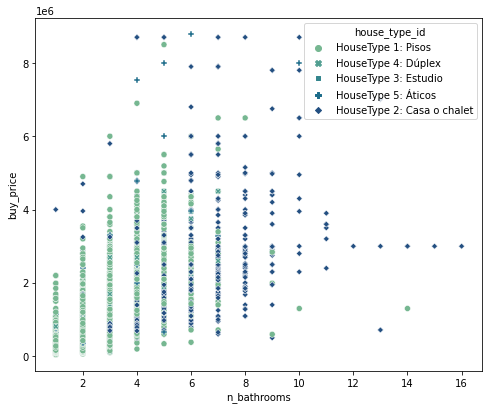

In [152]:
f, ax = plt.subplots(figsize=(8, 6.5))

sns.scatterplot(data=data, x='n_bathrooms', y='buy_price', hue='house_type_id', style='house_type_id', palette='crest', ax=ax)
plt.show()

In [160]:
data.n_bathrooms.value_counts()

1.0     9096
2.0     7409
3.0     2427
4.0     1170
5.0      871
6.0      422
7.0      182
8.0       94
9.0       37
10.0      13
11.0       7
14.0       3
13.0       3
15.0       1
16.0       1
12.0       1
Name: n_bathrooms, dtype: int64

In [164]:
data.loc[data.n_bathrooms.isnull(),['title', 'subtitle','sq_mt_built', 'n_rooms','n_floors', 'floor', 'buy_price', 'house_type_id']]

Empty DataFrame
Columns: [title, subtitle, sq_mt_built, n_rooms, n_floors, floor, buy_price, house_type_id]
Index: []

The majority of missing values belong to flats besides 1 duplex and 2 studies.

Let's see what is the most common number for each type.

In [156]:
data[data.house_type_id.str.contains('Piso') | data.house_type_id.str.contains('Estudio') | 
     data.house_type_id.str.contains('Dúplex')].groupby(['house_type_id', 'n_bathrooms']).agg({'n_bathrooms': ['count']}).unstack()

n_bathrooms                                            \
                           count                                             
n_bathrooms                 1.0     2.0     3.0    4.0    5.0   6.0   7.0    
house_type_id                                                                
HouseType 1: Pisos        8246.0  6530.0  1794.0  677.0  341.0  86.0  14.0   
HouseType 3: Estudio       358.0    28.0     NaN    NaN    NaN   NaN   NaN   
HouseType 4: Dúplex        127.0   252.0   166.0   67.0   42.0  17.0   4.0   

                                          
                                          
n_bathrooms          8.0  9.0  10.0 14.0  
house_type_id                             
HouseType 1: Pisos    1.0  3.0  1.0  1.0  
HouseType 3: Estudio  NaN  NaN  NaN  NaN  
HouseType 4: Dúplex   NaN  NaN  NaN  NaN

We'll asign 1 to flats, 2 to duplex and 1 to studies.

We'll define a function to fill missing values of every house's type.

In [157]:
def fill_missing(column_to_change, column_ref, **kwargs):
    '''Fill missing values in a column by grouping them to categories in another column.
       Parameters: column to change; column used as reference; dictionary with pairs category:new_value
       Returns: Nothing, the changes are done in place. Outputs progress.'''
    
    for type_house, new_number in kwargs.items():
        #Select the null rows to change of a especific category
        rel_no = (data[column_ref].str.contains(type_house)) & (data[column_to_change].isnull())
        #Apply the new value
        data.loc[(rel_no), column_to_change] = new_number
        print('Done ' + type_house)

In [158]:
bathrooms_data = {'Dúplex': 2, 'Piso': 1, 'Estudio': 1}
fill_missing('n_bathrooms', 'house_type_id', **bathrooms_data)

Done Dúplex
Done Piso
Done Estudio


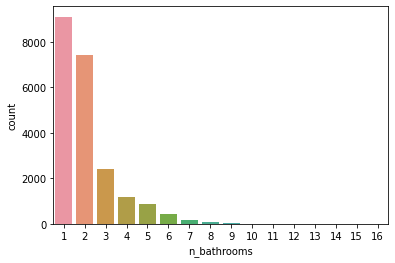

In [165]:
#Finally, we change the type and plot the data
data = data.astype({'n_bathrooms' : 'int64'})
sns.countplot(data=data, x='n_bathrooms')

## n_floors

Next one: 'n_floors' is useful when it's a house not a flat.

In [166]:
print(data.n_floors.notnull().sum())
data[(data.n_floors.notnull())]['house_type_id'].value_counts()

1436


HouseType 2: Casa o chalet    1436
Name: house_type_id, dtype: int64

The only ones with values are houses. We'll have to add 1 floor for 'Estudios', top floors and flats, and 2 for duplex.

In [167]:
floors_data = {'Dúplex': 2, 'Piso': 1, 'Estudio': 1, 'Ático': 1}
fill_missing('n_floors', 'house_type_id', **floors_data)

Done Dúplex
Done Piso
Done Estudio
Done Ático


In [168]:
data[(data.n_floors.isnull())]['house_type_id'].value_counts()

HouseType 2: Casa o chalet    502
Name: house_type_id, dtype: int64

We are left with 502 houses without number of floors. Let's take a look at them.

In [169]:
print("Data from houses without number of floors: ")
print(data.loc[data.n_floors.isnull(),['sq_mt_built', 'n_rooms', 'n_bathrooms', 'sq_mt_allotment', 'buy_price']].describe())
print("Data from the rest of the houses: ")
print(data.loc[data.n_floors.notnull() & data.house_type_id.str.contains('Casa'),['sq_mt_built', 'n_rooms', 'n_bathrooms', 'sq_mt_allotment', 'n_floors',
                                                                                  'buy_price']].describe())
print("Number of floors: ")
floor_number = data[(data.n_floors.notnull()) & (data.house_type_id.str.contains('Casa'))]['n_floors'].value_counts()
print(floor_number)

Data from houses without number of floors: 
       sq_mt_built     n_rooms  n_bathrooms  sq_mt_allotment     buy_price
count   502.000000  502.000000   502.000000       322.000000  5.020000e+02
mean    533.004320    5.364542     4.972112       210.096273  1.884695e+06
std     381.334173    1.837885     2.163760       253.102666  1.358770e+06
min      30.000000    1.000000     1.000000         1.000000  3.900000e+04
25%     306.500000    4.000000     3.250000         1.000000  9.125000e+05
50%     421.500000    5.000000     5.000000       117.000000  1.600000e+06
75%     700.000000    6.000000     6.000000       325.000000  2.500000e+06
max    2400.000000   18.000000    15.000000       994.000000  8.700000e+06
Data from the rest of the houses: 
       sq_mt_built      n_rooms  n_bathrooms  sq_mt_allotment     n_floors  \
count  1436.000000  1436.000000  1436.000000      1107.000000  1436.000000   
mean    480.242362     5.331476     4.715181       251.160795     3.130919   
std     298.

Comparing both groups we can see that they have similar values. So we can assume that the number of floors would be similar.

Checking the number of floors for the second group we can see that mean and median are 3. Investigating a bit more, we can see that the most frequent number is 4.

However, we can't give 3 floors to a 30 m² built house.

We'll need more than their size because values overlapped, so we'll add rooms and check them in more detail.

In [170]:
print("Houses without number of floors")
data[data.n_floors.isnull()].groupby('n_rooms').agg({'sq_mt_built': ['min','max', 'mean'], 'id':'count'})

Houses without number of floors


sq_mt_built                              id
                min          max         mean count
n_rooms                                            
1              42.0   400.000000   155.750000     4
2              30.0   187.000000    87.562500    16
3              65.0  1244.709712   270.249063    43
4              70.0   624.000000   330.705128    78
5              80.0  1477.832512   477.650162   155
6             149.0  1700.477327   593.050131   110
7             107.0  1399.825022   794.214102    44
8             264.0  2400.000000   874.412705    22
9             350.0  2400.000000  1130.132842    18
10            570.0  2400.000000  1630.182594     7
11            654.0   654.000000   654.000000     2
12            350.0   350.000000   350.000000     1
13            513.0   513.000000   513.000000     1
18            750.0   750.000000   750.000000     1

In [171]:
print("Houses with number of floors")
data[(data.n_floors.notnull()) & (data.house_type_id.str.contains('Casa'))].groupby(['n_floors', 'n_rooms']).agg({'sq_mt_built': ['min','max', 'mean'], 
                                                                                                                  'id':'count'})

Houses with number of floors


sq_mt_built                              id
                          min          max         mean count
n_floors n_rooms                                             
1.0      1          38.000000    64.000000    51.000000     2
         2          65.000000   419.000000   170.000000     4
         3          72.000000   163.000000   108.000000    11
         4          64.000000   625.000000   198.500000    16
         5         180.000000  1100.151745   445.315175    10
         6         256.000000   840.000000   536.666667     3
         7         750.000000   800.000000   775.000000     2
         8         800.000000  1060.022026   913.252753     8
2.0      1          32.000000    90.000000    60.666667     3
         2          83.000000   208.000000   135.285714     7
         3          67.000000   350.000000   140.756098    41
         4          75.000000  1000.000000   278.814286    70
         5         139.000000  1245.047490   444.135404    95
         6         180.000000  1500.000000   579.866484    45
         7         189.000000  1245.047490   687.613077    29
         8         400.000000  1200.000000   869.676218    16
         9         978.000000  1016.030707   998.010236     3
         10        654.000000   654.000000   654.000000     1
         11        685.000000  1000.000000   842.500000     2
         13        654.000000   654.000000   654.000000     1
         15        390.000000   390.000000   390.000000     1
3.0      2         360.000000   360.000000   360.000000     1
         3         127.000000   750.000000   297.071429    28
         4         130.000000   850.000000   326.724138   116
         5         135.000000  1449.477352   464.748569   129
         6         195.000000  2035.278155   615.982924   115
         7         229.000000  1494.462541   849.364846    50
         8         274.000000  2400.000000   828.410600    17
         9         450.000000  2081.332053  1247.031070     8
         10        789.000000  2400.000000  1264.308116     6
         11        250.000000  2400.000000  1295.970342     3
         12       1100.073584  1379.974326  1226.642134     3
4.0      2         432.000000   432.000000   432.000000     1
         3         180.000000   553.000000   305.478261    23
         4         168.000000   750.000000   343.170000   100
         5         189.000000  1226.158038   415.308174   222
         6         233.000000  1150.023116   502.795458   127
         7         200.000000  2000.000000   631.862585    55
         8         331.000000  1000.000000   719.619048    21
         9         370.000000   984.000000   715.750000     8
         10        503.000000   600.000000   535.333333     3
         11       2400.000000  2400.000000  2400.000000     1
         12        416.000000  2199.874293  1307.937146     2
         13       1619.870410  1619.870410  1619.870410     1
         16       1307.800093  1307.800093  1307.800093     1
         24        682.000000   750.000000   704.666667     3
5.0      4         252.000000   505.000000   378.000000     5
         5         280.000000   750.000000   453.714286    14
         7         409.000000   409.000000   409.000000     1
         8         558.000000   558.000000   558.000000     1
7.0      9        1285.189718  1285.189718  1285.189718     1

After studying both statistics these are the actions we'll take:
* Those with just one room will get 2 floors. There are more houses with 1 room and 2 floors.
* Those with 2 rooms will get also 2 floors. They fit better.
* Those with 3 rooms will get 3 floors. It's the mode.
* Those with 4 rooms will get 3 floors too. Again, it's the mode and the means are similar.
* Those with 5 rooms will get 4 floors. Folowing the mode.
* The rest will get 4 floors. It's the most common number.

We'll define a new function to fill them.

In [172]:
def fill_nfloors(column_to_change, column_ref, **kwargs):
    '''Fill number of floors' column grouping them by number of rooms.
       Parameters: column to change; column used as reference; dictionary with pairs number_of_rooms: number_of_floors
       Return: Nothing, changes are done on site. Output progress.'''
    
    for nrooms, new_number in kwargs.items():
        #Select null rows with correct number of rooms
        rel_no = (data[column_ref] == int(nrooms)) & (data[column_to_change].isnull())
        #Apply new number of floors
        data.loc[(rel_no), column_to_change] = new_number
        print('Done ' + nrooms)

In [173]:
n_floors_data = {'1':2, '2':2, '3':3, '4':3, '5':4, '6':4, '7':4, '8':4, '9':4, '10':4, '11':4, '12':4, '13':4, '18':4}
fill_nfloors('n_floors', 'n_rooms', **n_floors_data)

Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
Done 10
Done 11
Done 12
Done 13
Done 18


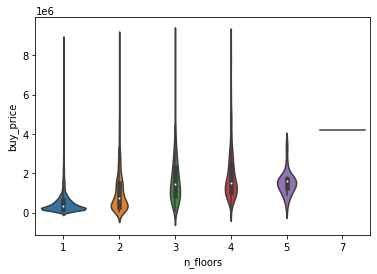

In [174]:
data = data.astype({'n_floors' : 'int64'})
sns.violinplot(data=data, x='n_floors', y='buy_price' )

## floor - height
Let's check the 'floor' column.

In [175]:
print("Number of null entries: {}".format(data.floor.isnull().sum()))
print("---------Types of floors-----------")
print(data.floor.value_counts())

Number of null entries: 2604
---------Types of floors-----------
1                       4440
2                       3546
3                       3001
4                       2323
Bajo                    2144
5                       1310
6                        913
7                        556
8                        326
Entreplanta exterior     236
9                        181
Semi-sótano exterior      55
Semi-sótano interior      36
Entreplanta interior      32
Sótano interior           23
Sótano                     5
Sótano exterior            4
Entreplanta                3
Semi-sótano                1
Name: floor, dtype: int64


There are three types of names for ground, basement and subbasement levels. Normally, we may expect some price's difference from an exterior anything to an interior one. 

Let's see if this is true.

In [176]:
print(data.loc[(data.floor.notnull()) & (data.floor.str.contains('Sótano$')), ['sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price']].describe())
print(data.loc[(data.floor.notnull()) & (data.floor.str.contains('Sótano interior')), ['sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price']].describe())
print(data.loc[(data.floor.notnull()) & (data.floor.str.contains('Sótano exterior')), ['sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price']].describe())

       sq_mt_built   n_rooms  n_bathrooms      buy_price
count      5.00000  5.000000     5.000000       5.000000
mean      90.40000  2.800000     1.200000  263980.000000
std       46.62939  1.643168     0.447214  136174.344133
min       47.00000  1.000000     1.000000  175000.000000
25%       62.00000  2.000000     1.000000  175000.000000
50%       62.00000  2.000000     1.000000  195000.000000
75%      131.00000  4.000000     1.000000  280000.000000
max      150.00000  5.000000     2.000000  494900.000000
       sq_mt_built    n_rooms  n_bathrooms      buy_price
count    23.000000  23.000000    23.000000      23.000000
mean     70.304348   1.869565     1.173913  240386.956522
std      54.144113   1.217462     0.387553  114106.522419
min      30.000000   0.000000     1.000000   97000.000000
25%      41.000000   1.000000     1.000000  164500.000000
50%      54.000000   2.000000     1.000000  200000.000000
75%      69.500000   2.000000     1.000000  282500.000000
max     270.000000   5.

There is no significant difference between basement flats and the same happens for the other two. 

We are going to group together the same levels and turn them all into numbers.

In [177]:
data.floor.replace({'Bajo': -1,'Entreplanta exterior': 0, 'Entreplanta interior': 0, 'Entreplanta' : 0, 'Semi-sótano exterior' : -2, 'Semi-sótano interior': -2,
                   'Semi-sótano': -2, 'Sótano interior' : -3, 'Sótano' : -3, 'Sótano exterior': -3}, inplace=True)

In [178]:
#Let's check the missing values.
print("Not null values: ")
print(data.loc[(data.floor.notnull()),'house_type_id'].value_counts())
print("Null values: ")
print(data.loc[(data.floor.isnull()),'house_type_id'].value_counts())

Not null values: 
HouseType 1: Pisos      17163
HouseType 5: Áticos       939
HouseType 4: Dúplex       655
HouseType 3: Estudio      378
Name: house_type_id, dtype: int64
Null values: 
HouseType 2: Casa o chalet    1938
HouseType 1: Pisos             542
HouseType 5: Áticos             93
HouseType 4: Dúplex             21
HouseType 3: Estudio            10
Name: house_type_id, dtype: int64


We'll give 'Aticos' the highest number: 10. We don't know the exact height but to point out that it's the highest.

A random value for detached houses because height doesn't matter there: -5

Let's check the others:

In [179]:
def check_values(column_ref, house_type):
    '''Find out how many unique values each house's category has in a column.
       Parameters: column to check; type of house
       Returns: a Series with the unique values for a house's category'''
    
    return data.loc[(data[column_ref].notnull()) & (data.house_type_id.str.contains(house_type)), column_ref].value_counts()

In [180]:
check_values('floor', 'Estudio')

-1    137
1      64
2      56
3      45
4      28
6      14
5      13
-2      8
0       6
7       3
-3      2
8       2
Name: floor, dtype: int64

In [181]:
floor_heigth = {'Áticos': 10, 'Casa': -5, 'Estudio': -1}

In [182]:
check_values('floor', 'Dúplex')

-1    152
3     115
2     100
1      88
4      84
5      40
6      27
7      19
8      13
9      10
0       7
Name: floor, dtype: int64

In [183]:
#We'll give the most common value
floor_heigth['Dúplex'] = -1
fill_missing('floor', 'house_type_id', **floor_heigth)

Done Áticos
Done Casa
Done Estudio
Done Dúplex


In [184]:
pisos_floor = check_values('floor', 'Piso')
pisos_floor_total = pisos_floor.sum()
pisos_floor

1     4224
2     3325
3     2705
4     2055
-1    1855
5     1133
6      688
7      424
0      258
8      251
9      131
-2      84
-3      30
Name: floor, dtype: int64

We are going to try something different here as the proportions aren't very different.

Instead of chosing the most common value, we are going to select randomly among the 4 most common.

In [185]:
floor1 = pisos_floor.loc['1']/pisos_floor_total*100
floor2 = pisos_floor.loc['2']/pisos_floor_total*100
floor3 = pisos_floor.loc['3']/pisos_floor_total*100
floor4 = pisos_floor.loc['4']/pisos_floor_total*100
floor_total = floor1 + floor2 + floor3 + floor4

#Floors 1, 2, 3 and 4 contain 72% of all flats.

In [186]:
rng = np.random.default_rng()

def random_number(options):
    '''Chose an integer among the ones given based on their probalities
       Parameters: list of integers.
       Return: An integer'''
    
    return rng.choice(options, p=[floor1/floor_total,floor2/floor_total,floor3/floor_total,floor4/floor_total])

#Call the function, receive an integer and apply it to a null row in floor's column
data.floor.mask(data.floor.isnull(), random_number([1,2,3,4]), inplace=True)

data = data.astype({'floor' : 'int64'})

'is_floor_under' is true when it's a ground floor or basement. It's not necessary. We already have that information in 'floor'.


In [187]:
data.drop(columns=['is_floor_under'], inplace=True)

## Neighborhood_id

In [188]:
data.neighborhood_id.iloc[0]

'Neighborhood 135: San Cristóbal (1308.89 €/m2) - District 21: Villaverde'

'neighborhood_id' consists of a number, a name and the mean price by neighborhood. Also, the district's number and its name.

We can use this to help locate the houses but we'll only keep the numbers and separate them in two new columns.

In [189]:
data['neighborhood'] = data.neighborhood_id.str.extract('(\d+):', expand=True)
data['district'] = data.neighborhood_id.str.extract('District (\d+)', expand=True)

data.drop(columns=['neighborhood_id'], inplace=True)

data = data.astype({'neighborhood' : 'int64'})
data = data.astype({'district' : 'int64'})

The next columns, 'operation' and 'buy_price_by_area' are not needed. We'll only keep buy_price.

rent_price could be useful for another project!

In [190]:
data.drop(columns=['operation', 'buy_price_by_area'], inplace=True)

We have worked with 'house_type_id' many times, but let's see the elements again.

In [191]:
data.house_type_id.unique()

array(['HouseType 1: Pisos', 'HouseType 4: Dúplex',
       'HouseType 3: Estudio', 'HouseType 5: Áticos',
       'HouseType 2: Casa o chalet'], dtype=object)

In [192]:
#We only need the number so:
data['house_type'] = data.house_type_id.str.extract('(\d)', expand=True)

data.drop(columns=['house_type_id'], inplace=True)

data = data.astype({'house_type' : 'int64'})

'is_new_development' and 'built_year are a bit confusing because we don't know since when a house is considered  new. And 'built_year' has some values like 2022, so we'll drop them.

In [193]:
data.drop(columns=['is_new_development', 'built_year'], inplace=True)

The next 13 columns are boolean. They describe interesting features but many of them have more than 50% of missing values. This is impossible to fill. We'll eliminate them except 'has_lift' and 'is_exterior' which have less missing values. 

The type of heating (central or individual) is a bit irrelevant so we'll eliminate them too. 


In [194]:
data.drop(columns=['has_central_heating', 'has_individual_heating'], inplace=True)

## has_lift

In [195]:
data[data.has_lift.notnull()].groupby('house_type').house_type.count()

house_type
1    17281
3      382
4      667
5     1026
Name: house_type, dtype: int64

All type 2 houses 'Casa o chalet' have missing values. This is fine because this houses don't have lifts (normally), so we'll give them a False value.

In [196]:
rel_casa_nolift = (data.house_type == 2)
data.loc[(rel_casa_nolift), 'has_lift'] = False

In [197]:
data[data.has_lift.isnull()].groupby('house_type').house_type.count()

house_type
1    424
3      6
4      9
5      6
Name: house_type, dtype: int64

We have a few houses left with no values, so we'll give them False, too.

In [198]:
data.has_lift.fillna(False, inplace=True)

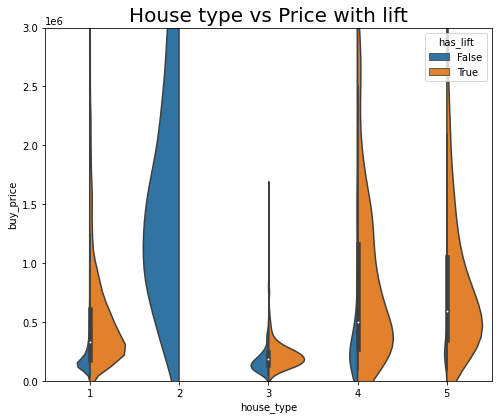

In [199]:
f, ax = plt.subplots(figsize=(8, 6.5))

sns.violinplot(x='house_type', y='buy_price', hue='has_lift', data=data, split=True, scale='count')
ax.set_ylim(0,3000000)
plt.title("House type vs Price with lift", size=20)
plt.show()

## is_exterior

Let's do the same with 'is_exterior'

In [200]:
data[data.is_exterior.isnull()].groupby('house_type').house_type.count()

house_type
1    1051
2    1938
3      18
4      13
5      20
Name: house_type, dtype: int64

In [201]:
rel_casa_exterior = (data.house_type == 2)
data.loc[(rel_casa_exterior), 'is_exterior'] = True

There are no hints about this missing values.  We'll define a function to fill the null 'exterior' cells with a random option.

We also define a slight different version of the previous function 'randon_number'.

In [202]:
rng = np.random.default_rng()

def random_number(options, prob):
    '''Select a value based on its given probabilities
       Parameters: a list of values; a list of their probabilities
       Returns: a value'''
    
    #select an option based on their probabilities
    return rng.choice(options, p=[prob[1],prob[0]])

In [203]:
def ext_prob(house_type):
    '''Fill the null values in the "exterior" column according to the probabilites of each house's type
       Parameters: the house's type
       Returns: Nothing, changes are done in place'''
    
    #Calculate the number of trues and falses for houses of a specific type
    ext0, ext1 = data[(data.is_exterior.notnull()) & (data.house_type == house_type)].groupby('is_exterior').is_exterior.count()
    #Obtain the total number of houses of this category without null values
    ex_total = ext0 + ext1
    #Find out houses with null values in 'exterior'
    mask_ex = (data.is_exterior.isnull()) & (data.house_type == house_type)
    #Select an option, True or False, according to the probabilities of this house's type and apply it to the null ones
    data.is_exterior.mask(mask_ex, random_number([True, False], [ext1/ex_total, ext0/ex_total]), inplace=True) 

In [204]:
exterior_null = [1,3,4,5]
map(ext_prob, exterior_null)

In [205]:
data = data.astype({'is_exterior' : 'bool'})

'is_renewal_needed' is a basic feature that will impact the final price.

We'll keep 'has_parking' because it always afects the price and remove 'is_parking_included_in_price' and 'parking_price' because they have too many missing values and don't add anything.

In [206]:
columns_todrop = ['has_ac', 'has_fitted_wardrobes', 'has_garden', 'has_pool','has_terrace', 'has_balcony', 'has_storage_room', 'is_accessible', 'has_green_zones',
                 'is_parking_included_in_price', 'parking_price','is_orientation_north', 'is_orientation_west', 'is_orientation_south', 'is_orientation_east']

data.drop(columns=columns_todrop, inplace=True)

## energy_certificate

'energy_certificate' is compulsory in Spain for buying a flat since several years ago.

In [207]:
data.energy_certificate.value_counts()

en trámite         10934
no indicado         3669
E                   2701
D                   1121
G                    894
F                    674
A                    618
C                    580
B                    452
inmueble exento       96
Name: energy_certificate, dtype: int64

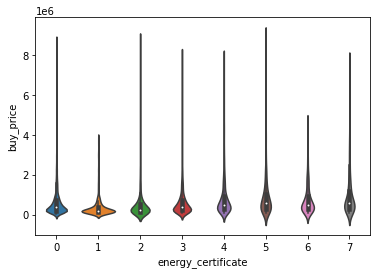

In [218]:
sns.violinplot(data=data, x='energy_certificate', y='buy_price')
plt.show()

It looks like there's no much difference between values.

We'll replace letters with numbers.

In [208]:
data.energy_certificate.replace({'en trámite': 0,'no indicado': 0, 'inmueble exento': 0, 'G' : 1, 'F' : 2, 'E': 3, 'D': 4, 'C':5, 'B':6, 'A':7}, inplace=True)

In [209]:
data.drop(columns=['title', 'subtitle', 'raw_address'], inplace=True)

And, finally, this is the result. 16 columns with no missing values.

In [215]:
print(data.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21739 entries, 0 to 21741
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21739 non-null  int64  
 1   sq_mt_built         21739 non-null  float64
 2   n_rooms             21739 non-null  int64  
 3   n_bathrooms         21739 non-null  int64  
 4   n_floors            21739 non-null  int64  
 5   sq_mt_allotment     21739 non-null  float64
 6   floor               21739 non-null  int64  
 7   buy_price           21739 non-null  int64  
 8   is_renewal_needed   21739 non-null  bool   
 9   has_lift            21739 non-null  bool   
 10  is_exterior         21739 non-null  bool   
 11  energy_certificate  21739 non-null  int64  
 12  has_parking         21739 non-null  bool   
 13  neighborhood        21739 non-null  int64  
 14  district            21739 non-null  int64  
 15  house_type          21739 non-null  int64  
dtypes: b

Let's see what has happened to the correlation matrix

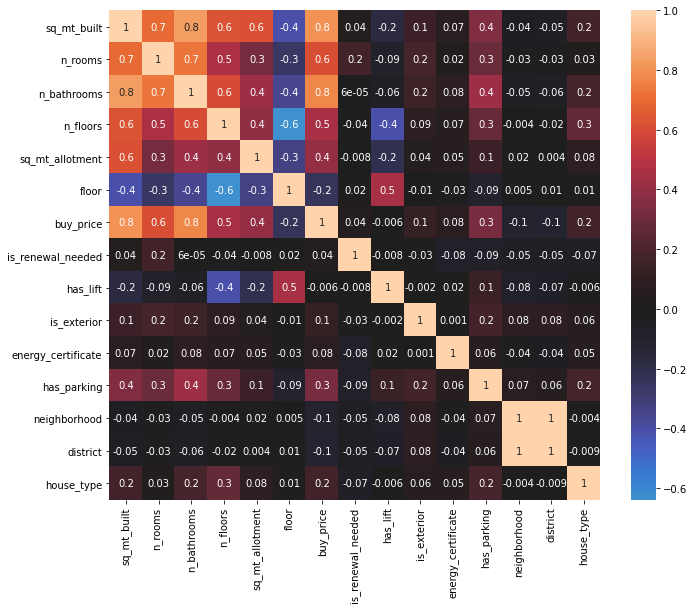

In [216]:
corr = data.iloc[:,1:].corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr ,annot=True, fmt='.1g',center=0) 
plt.show()

## Last impressions

There's more colour in this plot, with more positive and negative correlations than before.

'buy_price' keeps the same values for m² built, number of rooms and bathrooms. Number of floors and m² allotment increase their correlations, although they aren't significant enough.

Flat's height has a -0.2 value. Maybe explained by giving a -5 to 'Casas' category. 

The rest of the columns have very small values, showing a small direct effect on our target variable and among them. 

However, houses' prices depend on more than linear correlations (or so I hypothesize), but testing that will have to wait for another notebook.


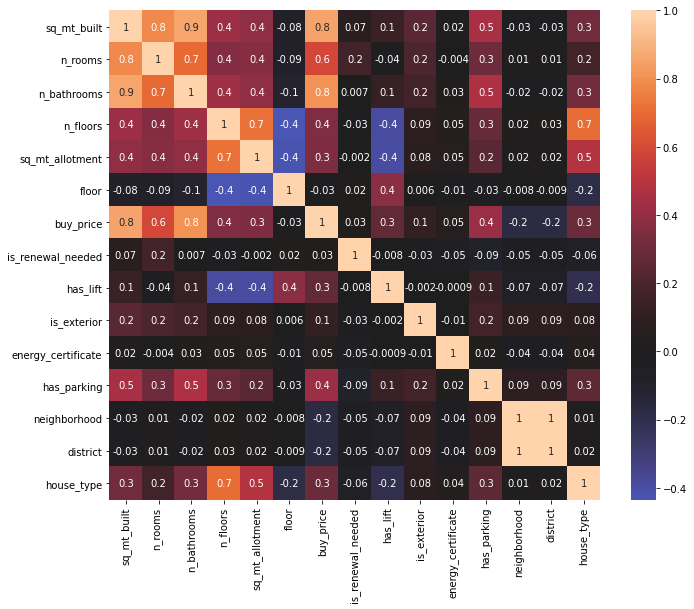

In [101]:
corr = data.iloc[:,1:].corr("spearman")
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr ,annot=True, fmt='.1g',center=0) 
plt.show()

Calculating the spearman correlation shows small differences. While the first one searches for linear relationships, this one looks for monotonic relationships.

In [102]:
data.to_csv('madrid_houses_clean.csv')

Saving the dataframe to a file was the last step. Now we can use it in other notebooks.

My next step will be to explore a bit more about this data placing each house on a map. This will allow us to see better the relationships between variables and how they are scattered among Madrid.

Stay tuned!